In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
datasetname='2nd-CuSn-MFF-FE-HCOOHCO.csv'
strlist = datasetname.split('.') 
savename=strlist[0]
dataset = pd.read_csv(datasetname)
print(dataset.head())
col = dataset.columns.values.tolist()
headers =col[0:-1]
features = np.array(dataset[headers])
labels = dataset['FEHCOOH/CO']

   CCN  C=O  CCC  CCC[C@@H](C)N  CO  C[C@H](N)C(=O)O  CN  CCCCN  CC(=O)O  \
0    3    1    4              1   1                1   2      2        1   
1    2    2    3              1   2                1   1      1        2   
2    0    0    0              0   0                0   0      0        0   
3    3    1    3              1   1                1   4      2        1   
4    0    2    0              0   2                0   0      0        0   

   CC[C@H](N)C(=O)O  ...  cc(C)nc(c)C  cc(C)n  ccc(nc)-c(c)n  cc(c)OC  \
0                 1  ...            0       0              0        0   
1                 1  ...            0       0              0        0   
2                 0  ...            0       0              0        0   
3                 1  ...            0       0              0        0   
4                 0  ...            0       0              0        0   

   ccc(cc)OC  COc  cc(O)ccn  Cc  cnc[nH]c  FEHCOOH/CO  
0          0    0         0   0         0       

In [2]:
plot_xgb_name_1= 'Feature importance of XGBoost model in '+str(savename)+'.png'
plot_xgb_name_2= 'Confusion Matrix of XGBoost model in '+str(savename)+'.png'
plot_xgb_name_3= 'ROC curve of XGBoost model in '+str(savename)+'.png'

plot_xgb_name_4= 'Feature importance2 of XGBoost model in '+str(savename)+'.png'

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
from sklearn import model_selection
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
X=features
y=labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15, random_state=19)
cv = StratifiedShuffleSplit(n_splits=50, test_size=0.15, random_state=4)

In [5]:
from sklearn.model_selection import GridSearchCV
parameters= [{'learning_rate':[0.01,0.1,0.3,1],'n_estimators':[500,1000,2000,5000],'max_depth':[3,5,10]}]
clf = GridSearchCV(XGBClassifier(
             
             min_child_weight=1,
             gamma=0.5,
             subsample=0.6,
             colsample_bytree=0.6,
             objective= 'binary:logistic', #逻辑回归损失函数
             scale_pos_weight=1,
             reg_alpha=0,
             reg_lambda=1,
             seed=27
            ),
            param_grid=parameters,scoring='roc_auc') 
clf.fit(X_train, y_train)
print(clf.best_params_) 
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1]
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre))  

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 2000}
AUC Score : 0.500000
Accuracy : 0.7143


In [6]:
clf=clf.best_estimator_
clf

XGBClassifier(colsample_bytree=0.6, gamma=0.5, learning_rate=1,
              n_estimators=2000, seed=27, subsample=0.6)

In [7]:
clf.feature_importances_


array([0.04868264, 0.0479195 , 0.05216557, 0.        , 0.06628085,
       0.03947762, 0.05806873, 0.        , 0.03500703, 0.        ,
       0.        , 0.04968236, 0.        , 0.05657592, 0.05296464,
       0.05620239, 0.        , 0.        , 0.06308998, 0.04465714,
       0.        , 0.        , 0.05346023, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06331211,
       0.        , 0.05451649, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05429891, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10363792, 0.        ],
      dtype=float32)

feature_name: Cc importance:  0.10363792
feature_name: CO importance:  0.06628085
feature_name: C[C@@H](N)C(=O)O importance:  0.063312106
feature_name: cccnc importance:  0.06308998
feature_name: CN importance:  0.058068726
feature_name: ccc importance:  0.056575917
feature_name: ccccn importance:  0.056202386
feature_name: CC importance:  0.054516494
feature_name: ccncc importance:  0.054298915
feature_name: ccn importance:  0.053460225


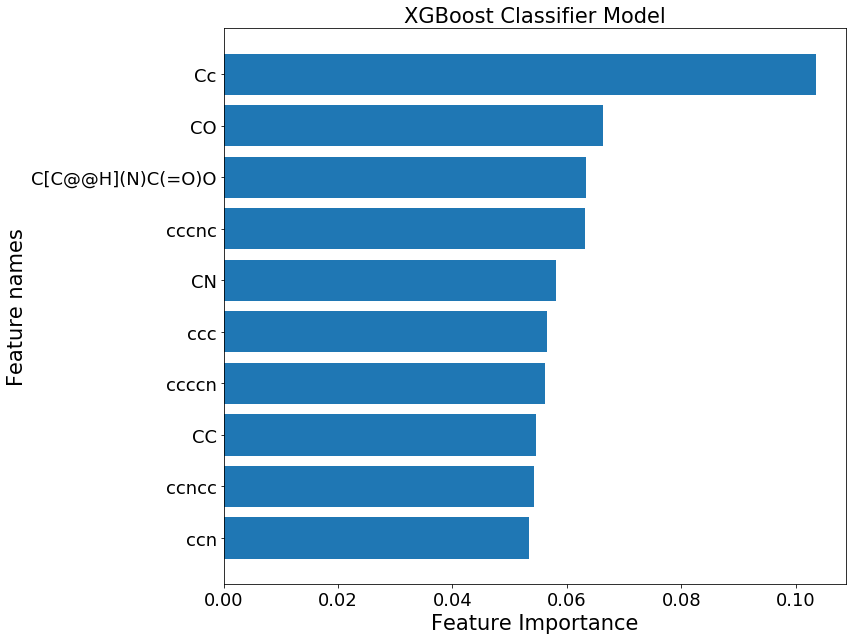

In [8]:
title=headers
p = np.argsort(-clf.feature_importances_)
feat=[]
importance=[]
for i in range(10):
    print('feature_name:', title[p[i]], 'importance: ', clf.feature_importances_[p[i]])
    feat.append(title[p[i]])
    importance.append(clf.feature_importances_[p[i]])
    
feat=np.array(feat)
importance=np.array(importance)
# Plot the feature importances of the forest

sorted_idx = importance.argsort()
y_ticks = np.arange(1, len(feat)+1).flatten().tolist()

#设置输出的图片大小
figsize = 12,9
fig, ax = plt.subplots(figsize=figsize)
# ax.barh(range(len(model.feature_importances_)), model.feature_importances_)
ax.barh(y_ticks, importance[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feat[sorted_idx])

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax.set_xlabel('Feature Importance',font1)
ax.set_ylabel('Feature names',font1)
ax.set_title("XGBoost Classifier Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
fig.tight_layout()
plt.savefig(plot_xgb_name_1, dpi=600)

plt.show()

In [9]:
feature_numbers=10
idx_third = importance.argsort()[-feature_numbers]
threshold = importance[idx_third] + 0.01
idx_features = (-importance).argsort()[:feature_numbers]
name_features = np.array(feat)[idx_features]
print('Selected features: {}'.format(name_features))
X_transform=dataset[name_features]

Selected features: ['Cc' 'CO' 'C[C@@H](N)C(=O)O' 'cccnc' 'CN' 'ccc' 'ccccn' 'CC' 'ccncc'
 'ccn']


In [10]:
[idx_features]

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, labels, test_size=0.15, random_state=19)
# 搭建随机森林模型
#XGBoost model
from sklearn.model_selection import GridSearchCV
parameters= [{'learning_rate':[0.01,0.1,0.3,1],'n_estimators':[500,1000,2000,5000],'max_depth':[3,5,10]}]
clf = GridSearchCV(XGBClassifier(
             
             min_child_weight=1,
             gamma=0.5,
             subsample=0.6,
             colsample_bytree=0.6,
             objective= 'binary:logistic', #逻辑回归损失函数
             scale_pos_weight=1,
             reg_alpha=0,
             reg_lambda=1,
             seed=27
            ),
            param_grid=parameters,scoring='roc_auc') 
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
clf.fit(X_train, y_train)
print(clf.best_params_) 
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1]
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre))   

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 5000}
AUC Score : 0.450000
Accuracy : 0.7143


In [12]:
clf=clf.best_estimator_

feature_name: Cc importance:  0.11925581
feature_name: ccc importance:  0.10615808
feature_name: C[C@@H](N)C(=O)O importance:  0.10522135
feature_name: CO importance:  0.10031174
feature_name: ccn importance:  0.097194605
feature_name: ccccn importance:  0.09676475
feature_name: cccnc importance:  0.096345365
feature_name: ccncc importance:  0.09509632
feature_name: CN importance:  0.09477631
feature_name: CC importance:  0.088875666


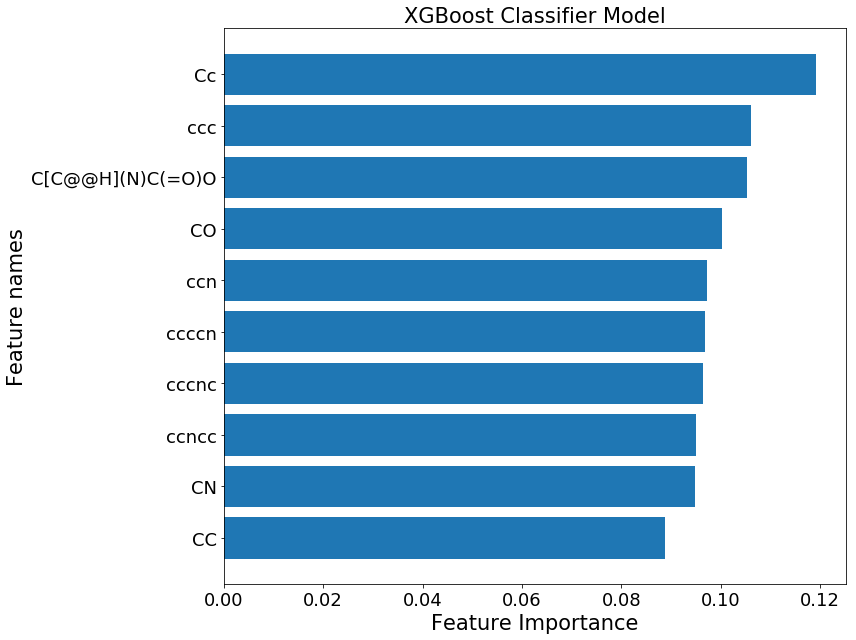

In [13]:
title=name_features
p = np.argsort(-clf.feature_importances_)
feat=[]
importance=[]
for i in range(len(name_features)):
    print('feature_name:', title[p[i]], 'importance: ', clf.feature_importances_[p[i]])
    feat.append(title[p[i]])
    importance.append(clf.feature_importances_[p[i]])
    
feat=np.array(feat)
importance=np.array(importance)
# Plot the feature importances of the forest

sorted_idx = importance.argsort()
y_ticks = np.arange(1, len(feat)+1).flatten().tolist()

#设置输出的图片大小

fig, ax = plt.subplots(figsize=figsize)
# ax.barh(range(len(model.feature_importances_)), model.feature_importances_)
ax.barh(y_ticks, importance[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feat[sorted_idx])

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax.set_xlabel('Feature Importance',font1)
ax.set_ylabel('Feature names',font1)
ax.set_title("XGBoost Classifier Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
fig.tight_layout()
plt.savefig(plot_xgb_name_4, dpi=600)

plt.show()

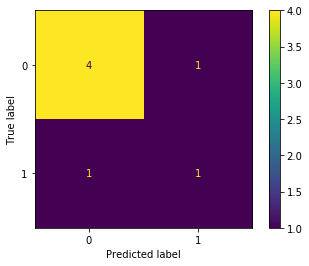

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_xgb_name_2, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

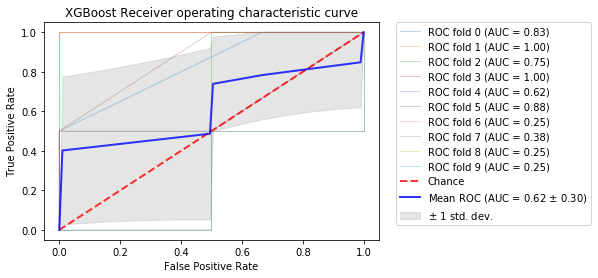

[0.4  0.8  0.75 0.75 0.5  0.75 0.5  0.5  0.25 0.5 ]


In [15]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
n_splits=10
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X[train], y[train])
    viz = plot_roc_curve(clf, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="XGBoost Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_xgb_name_3, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print(scores)